In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.FTTransformer import FTTransformer

In [4]:
model = FTTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="regression",
    num_encoding="PLE",
    n_bins=50,
    batch_size=4096,
    dropout=0.5,
    attn_dropout=0.5,
    ff_dropout=0.5,
    embedding_dim=64
    )

optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": "mse", "importances": None, "att_weights": None},
    metrics= {"output": "mse", "importances": None, "att_weights": None},)


--- Preprocessing ---


10it [00:01,  5.09it/s]
9it [00:02,  4.48it/s]


In [5]:
model.fit(
    model.training_dataset, 
    epochs=2, 
    validation_data=model.validation_dataset,
    verbose=0,
)

In [6]:
model.summary()

Model: "ft_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ft_transformer_encoder (FT  multiple                  574080    
 TransformerEncoder)                                             
                                                                 
 layer_normalization_8 (Lay  multiple                  128       
 erNormalization)                                                
                                                                 
 sequential_4 (Sequential)   (None, 144)               60336     
                                                                 
 dense_12 (Dense)            multiple                  145       
                                                                 
Total params: 634689 (2.42 MB)
Trainable params: 634689 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
dataset = model._get_dataset(model.data, shuffle=False)
importances = model.predict(dataset, verbose=0)["importances"]

--- Preprocessing ---


0it [00:00, ?it/s]

10it [00:01,  5.32it/s]


--- Preprocessing ---


10it [00:01,  5.13it/s]


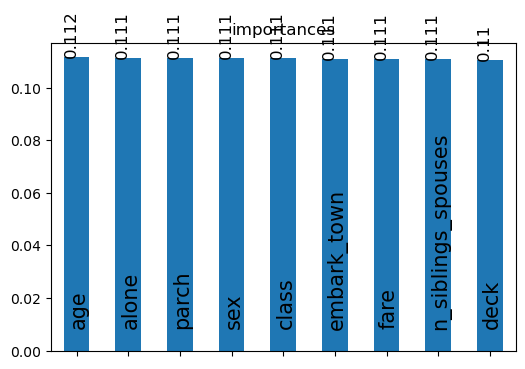

In [8]:
model.plot_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

10it [00:01,  5.30it/s]


2/2 [==============================] - 0s 63ms/step


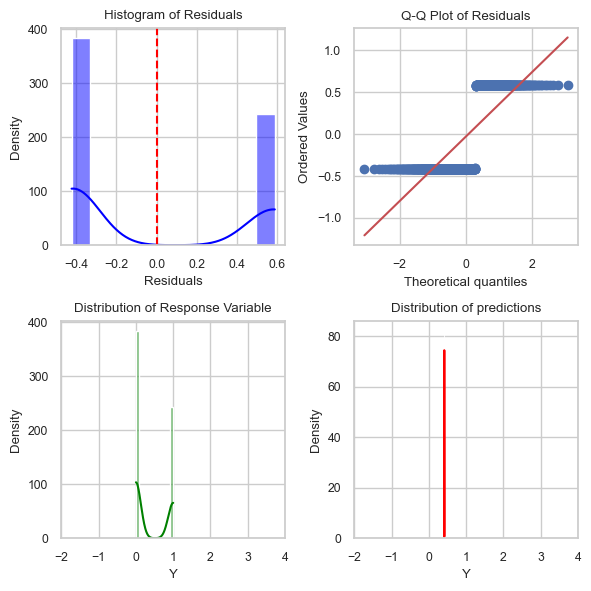

In [9]:
model.plot_analysis()